## Regresión Logística
# Tablas de contingencia

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/gender-purchase/Gender Purchase.csv")

In [3]:
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [4]:
df.shape

(511, 2)

In [5]:
contingency_table = pd.crosstab(df["Gender"],df["Purchase"])

In [6]:
contingency_table 

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [7]:
contingency_table.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [8]:
contingency_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [9]:
contingency_table.astype("float").div(contingency_table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Probabilidad condicional

* ¿Cuál es la probabilidad de que un cliente compre un producto si es hombre?
* ¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea hombre?

In [11]:
from IPython.display import display, Math, Latex

In [18]:
display (Math(r'P(Purchase|Male) = \frac {Número\ total\ de\ compras\ hechas\ por\ hombres}{Número\ total\ de\ hombres} =  \frac {Compran \cap Hombre}{Hombre}' ))

<IPython.core.display.Math object>

In [20]:
P1 = 121/(121+125)
P1

0.491869918699187

In [24]:
display (Math(r'P(Male|Purchase) = \frac {Número\ total\ de\ compras\ hechas\ por\ hombres}{Número\ total\ de\ compras} =  \frac {Compran \cap Hombre}{Total\ de\ compras}' ))

<IPython.core.display.Math object>

In [25]:
P2 = 121 / (121+ 159)
P2

0.43214285714285716

In [30]:
display (Math(r'P(No\ Purchase|Male) = 1- P(Purchase|Male)'))
1-P1

<IPython.core.display.Math object>

0.5081300813008129

In [31]:
display (Math(r'P(Female | Compra) = 1- P(Male| Compra)'))
1-P2

<IPython.core.display.Math object>

0.5678571428571428

In [38]:
display (Math(r'P(Purchase|Male)' ))
print(121/(121+125))
display (Math(r'P(No\ Purchase|Male)' ))
print(1- 121/(121+125))
display (Math(r'P(Purchase|Female)' ))
print(159/(159+106))
display (Math(r'P(No\ Purchase|Female)' ))
print(1- 159/(159+106))

<IPython.core.display.Math object>

0.491869918699187


<IPython.core.display.Math object>

0.5081300813008129


<IPython.core.display.Math object>

0.6


<IPython.core.display.Math object>

0.4


## Ratio de probabilidades
Cociente entre los casos de éxito sobre los casos de fracaso del suceso en cada grupo

In [64]:
display (Math(r'P_m = probabilidad\ de\ compra\ dado\ hombre ' ))
display (Math(r'odds_{purchase| male} =  \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N_{\bar p , m}} = \frac{hombres\ compran}{hombres\ no\ compran  }' ))
display (Math(r'odds_{purchase| male} \in [0,+\infty] ' ))
display (Math(r'P_f = probabilidad\ de\ compra\ dado\ mujer ' ))
display (Math(r'odds_{purchase| female} =  \frac{P_f}{1-P_f} = \frac{N_{p,f}}{N_{\bar p , f}} = \frac{mujeres\ compran}{mujeres\ no\ compran  }' ))
display (Math(r'odds_{purchase| female} \in [0,+\infty] ' ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
Pm = 121/(121+125)
Pf = 159/(159+106)
Pm, Pf

(0.491869918699187, 0.6)

In [50]:
odds_m = Pm/(1-Pm)
odds_f = Pf/(1-Pf)
odds_m, odds_f

(0.9680000000000002, 1.4999999999999998)

In [51]:
121/125

0.968

In [52]:
159/106

1.5

* Si el ratio es superior a 1 es más probable el éxito que el fracaso (Probabilidad de éxito > Probabilidad de fracaso)
* Si el ratio es inferior a 1 es más probable el fracaso que el éxito (Probabilidad de fracaso > Probabilidad de éxito)


In [67]:
display (Math(r'odds_{ratio} = \frac{odds_{purchase| male}}{odds_{purchase| female}} ' ))

<IPython.core.display.Math object>

In [69]:
odds_r = odds_m/ odds_f
odds_r

0.6453333333333335

## Regresión Logística desde Regresión Lineal

In [75]:
display (Math(r' y = \alpha + \beta \cdot x'))
display (Math(r' (x,y) \in [-\infty, +\infty]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [79]:
display (Math(r'P = probabilidad\ de\ compra\ dado\ hombre \in [0,1]'))
display (Math(r'x = variable\ independiente' ))
display (Math(r' ln(\frac{P}{1-P}) =  \alpha + \beta \cdot x \in [-\infty, +\infty]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
display (Math(r' \frac{P}{1-P} = e^{ \alpha + \beta \cdot x}'))

<IPython.core.display.Math object>

In [86]:
display (Math(r' e^ { \alpha + \beta \cdot x} = P(1 + e^ {\alpha + \beta \cdot x })'))

<IPython.core.display.Math object>

In [95]:
display (Math(r' P = \frac{e^ {\alpha + \beta \cdot x}} {1 + e^ {\alpha + \beta \cdot x} }') )

<IPython.core.display.Math object>

In [96]:
display (Math(r' P = \frac{1} {1 + e^ {-\alpha - \beta \cdot x} }') )

<IPython.core.display.Math object>

In [97]:
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \beta \cdot x)} }') )

<IPython.core.display.Math object>

In [106]:
display (Math(r' Si\ \alpha + \beta \cdot x \ es\ muy\ pequeño\ (negativo),\ entonces\ P\ tiende\ a\ 0' ) )
display (Math(r' Si\ \alpha + \beta \cdot x \ es\ muy\ grande\ (positivo),\ entonces\ P\ tiende\ a\ 1' ) )
display (Math(r' Si\ \alpha + \beta \cdot x = 0, \ entonces\ P=0.5' ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Regresión Logística múltiple

In [108]:
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \sum_{i=1}^{n}\beta_i \cdot x_i)} }') )

<IPython.core.display.Math object>

In [117]:
display (Math(r' \vec{\beta} = (\beta_1, \beta_2, \cdots, \beta_n)') )
display (Math(r' \vec{X} = (x_1, x_2, \cdots, x_n)') )
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \vec{\beta} \cdot \vec{X})} }') )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Implementación del método de máxima verosimilitud en regresión logística

## Definir la función de entorno L(b)

In [3]:
from IPython.display import display, Math, Latex

In [4]:
display (Math(r' L(\beta) = \prod_{i=0}^n P_i^{y_i}(1 - P_i)^{y_i} '))

<IPython.core.display.Math object>

In [27]:
display (Math(r' P_i = P(Y_i=1 | x_i) '))

<IPython.core.display.Math object>

In [145]:
def likelihood(y,pi):
    import numpy as np
    total_prod = 1
    for i in range(len(y)):
        t = pi[i]
        if y[i]==0:
            t = 1-pi[i]
        total_prod  = total_prod*t
    return total_prod
        
    

## Calcular las probabilidades de cada observación

In [11]:
display (Math(r' P_i = \frac{1} {1 + e^ {-( \sum_{j=0}^{n}\beta_j \cdot x_{ij})} }') )

<IPython.core.display.Math object>

In [146]:
def logitprobs(X,beta):
    import numpy as np
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi =  [0 for i in range(n_rows)] # lista de 0's
    expon = [0 for i in range(n_rows)] # lista de 0's
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex = X[i][j]*beta[j][0]
            expon[i] += ex
        with np.errstate(divide="ignore", invalid="ignore"):
            pi[i] = 1/(1+np.exp(-expon[i]))
    return pi
        

## Calcular la matriz diagonal W

In [15]:
display (Math(r'W = diag(P_i \cdot (1-P_i))_{i=1}^n '))

<IPython.core.display.Math object>

In [16]:
import numpy as np

In [17]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [147]:
def findW(pi):
    import numpy as np
    n = len(pi)
    W = np.zeros((n,n))
    for i in range(n):
        print (i)
        W[i][i] = pi[i]*(1-pi[i])
    return W

## Obtener la función logística

In [62]:
display (Math(r" x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} "))
display (Math(r" f(X) = X(Y-P) "))
display (Math(r" f'(X) = XWX^T "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [148]:
def logistics(X,Y, limit):
    import numpy as np
    from numpy import linalg
    n_rows = np.shape(X)[0]
    bias = np.ones((n_rows,1))
    X_new = np.append(bias, X, axis = 1)
    n_cols = np.shape(X_new)[1]
    beta = np.zeros((n_cols,1))
    root_dif = np.zeros((n_cols,1))
    iter_i = 10000
    while (iter_i>limit):
        print("iter_ i =", iter_i)
        print("ilimit =", limit)
        print("X_new =", X_new)
        print("beta =", beta)
        pi = logitprobs(X_new,beta)
        print("pi= ", pi)
        W = findW(pi)
        print("W= ", W)
        print("X_new= ", X_new)
        print("X_new T= ", np.transpose(np.matrix(X_new)))
        print("Y - P = ", np.transpose(np.matrix(Y-np.transpose(pi))))
        num = np.transpose(np.matrix(X_new))*np.transpose(np.matrix(Y-np.transpose(pi))) #XT(Y-P)
        den = -np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new)
        inc = np.array(linalg.inv(den)*num)
        beta = beta - inc
        print("inc = ", inc)
        print("beta = ", beta)
        iter_i = np.sum(inc*inc)
        print(" iter_i = ", iter_i)
        Li = likelihood(Y,pi)
        print("Li = ", Li)
    return beta
        
        
    
    
    

## Comprobación experimental

In [105]:
import numpy as np

In [94]:
X = np.array(range(10)).reshape(10,1)

In [95]:
X.shape

(10, 1)

In [96]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [126]:
Y = [0, 0, 0, 0, 1, 0 ,1,0, 1,1]

In [127]:
Y

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [98]:
bias = np.ones((10,1))

In [99]:
bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [100]:
X_new = np.append(bias, X, axis = 1)
X_new

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [149]:
a = logistics(X,Y,0.00001)

iter_ i = 10000
ilimit = 1e-05
X_new = [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
beta = [[0.]
 [0.]]
pi=  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0
1
2
3
4
5
6
7
8
9
W=  [[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
X_new=  [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
X_new T=  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
Y - P =  [[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [ 0.5]
 [-0.5]
 [ 0.5

In [81]:
np.zeros(4)

array([0., 0., 0., 0.])

Y = -3.69557172 + 0.66220827* X En el modelo logístico P = 1/(1+ exp(-Y))

## Con el paquete stats de Python

In [153]:
import statsmodels.api as sm

In [154]:
Y

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [155]:
X_new

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [156]:
logit_model = sm.Logit(Y,X_new)

In [157]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [158]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.3596
Time:                        14:14:41   Log-Likelihood:                -4.3101
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                   0.02781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6956      2.289     -1.615      0.106      -8.182       0.791
x1             0.6622      0.400      1.655      0.098      -0.122       1.446


## Regressión logística en predicciones bancarias

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [21]:
data.shape

(4119, 21)

In [22]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [23]:
(data["y"]=="yes").astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

In [24]:
data["y"] = (data["y"]=="yes").astype(int) #False = 0, True = 1

In [25]:
data["y"].describe()

count    4119.000000
mean        0.109493
std         0.312294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

In [26]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [27]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [28]:
import numpy as np

In [29]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

In [30]:
data["education"] = np.where(data["education"]=="high.school", "Hight School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [31]:
data["education"].unique()

array(['Basic', 'Hight School', 'University Degree',
       'Professional Course', 'Unknown', 'Illiterate'], dtype=object)

In [32]:
data["y"].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [33]:
data.groupby(by=["y"] )["age"].mean()

y
0    39.895311
1    41.889135
Name: age, dtype: float64

In [35]:
data.groupby(by=["y"] )[["duration", "age"]].mean()

,duration,age
y,,
0,219.40976,39.895311
1,560.78714,41.889135


In [36]:
Lista = data.select_dtypes(include=np.number).columns.tolist()
Lista

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [37]:
[Lista]

[['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y']]

In [38]:
data.groupby(by=["y"] )[Lista].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
y,,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072,0.0
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625,1.0


In [39]:
data.groupby(by=["education"] )[Lista].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
Hight School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frecuencia de compras')

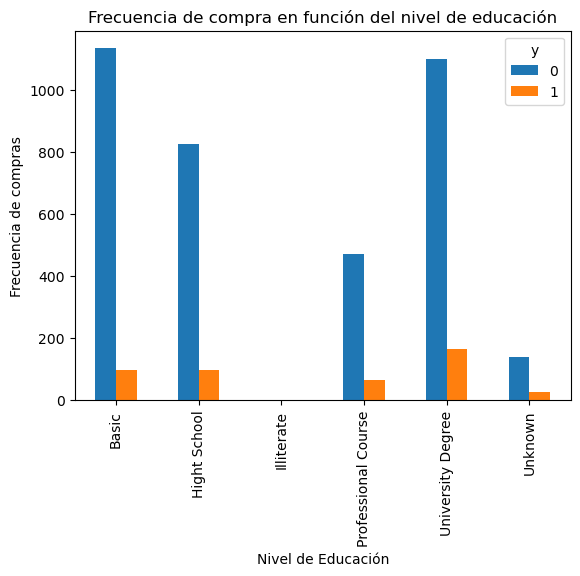

In [43]:
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Frecuencia de compras")

In [44]:
table = pd.crosstab(data.marital, data.y)
table

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [45]:
table.sum(1) #Suma de filas

marital
divorced     446
married     2509
single      1153
unknown       11
dtype: int64

In [46]:
table.sum(0) #Suma de columnas

y
0    3668
1     451
dtype: int64

In [47]:
table.div(table.sum(1).astype(float),axis=0) #Proporción de filas

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Número de clientes')

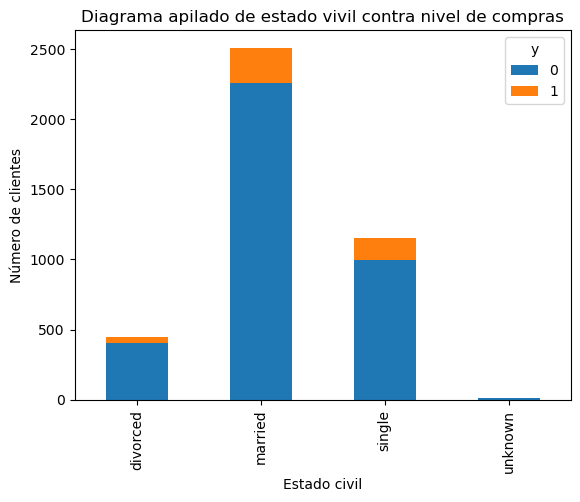

In [50]:
table.div(table.sum(1).astype(float),axis=0)
table.plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado vivil contra nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")


Text(0, 0.5, 'Proporción de clientes')

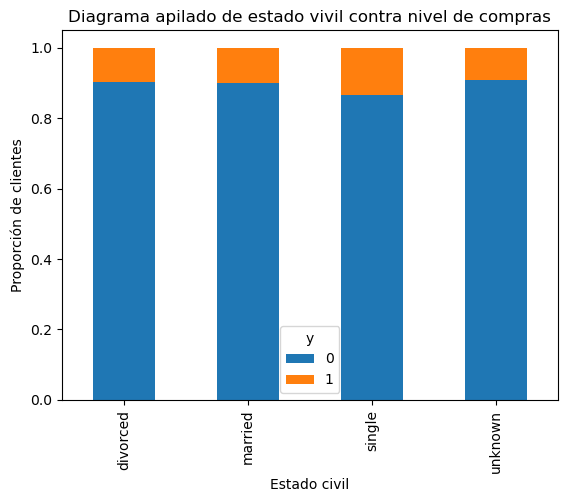

In [52]:
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado vivil contra nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

### El estado civil no es un buen predictor para comprar

In [53]:
table = pd.crosstab(data.day_of_week, data.y)
table

y,0,1
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


Text(0, 0.5, 'Proporción de clientes')

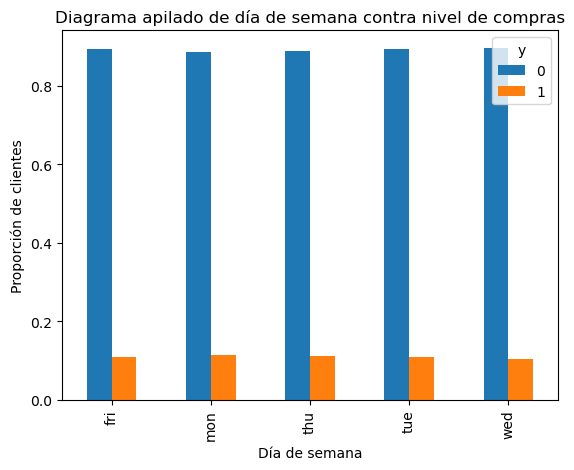

In [56]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = False)
plt.title("Diagrama apilado de día de semana contra nivel de compras")
plt.xlabel("Día de semana")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

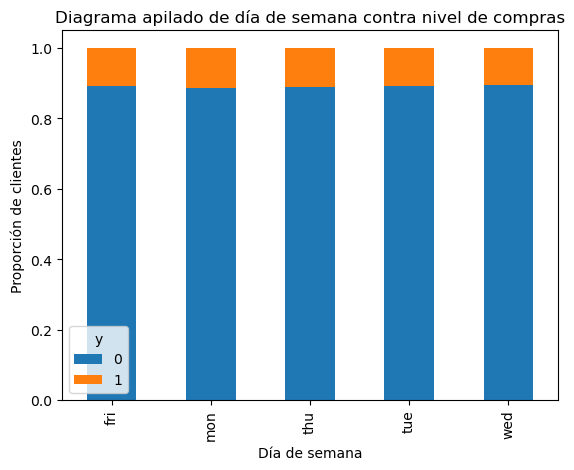

In [57]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de día de semana contra nivel de compras")
plt.xlabel("Día de semana")
plt.ylabel("Proporción de clientes")

### Día de semana no es un buen predictor de compras

In [58]:
table = pd.crosstab(data.month, data.y)
table

y,0,1
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


Text(0, 0.5, 'Proporción de clientes')

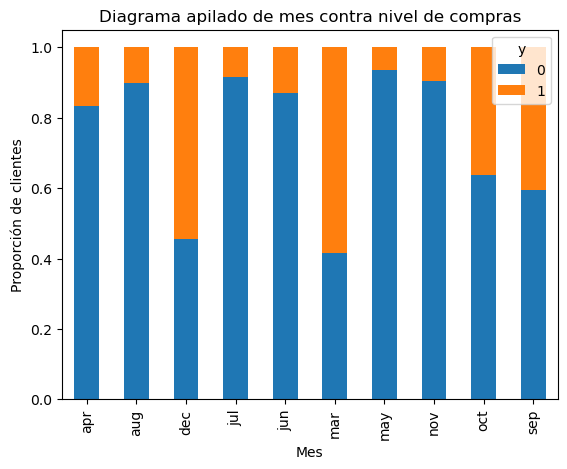

In [59]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de mes contra nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Proporción de clientes")

### El mes sí es un buen predictor de compras

Text(0, 0.5, 'Proporción de clientes')

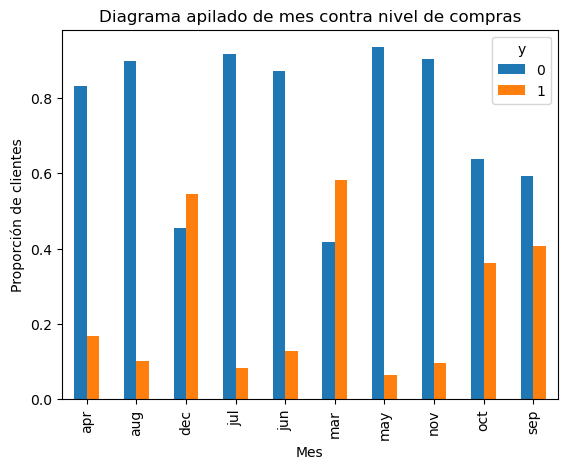

In [60]:
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = False)
plt.title("Diagrama apilado de mes contra nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Número de clientes')

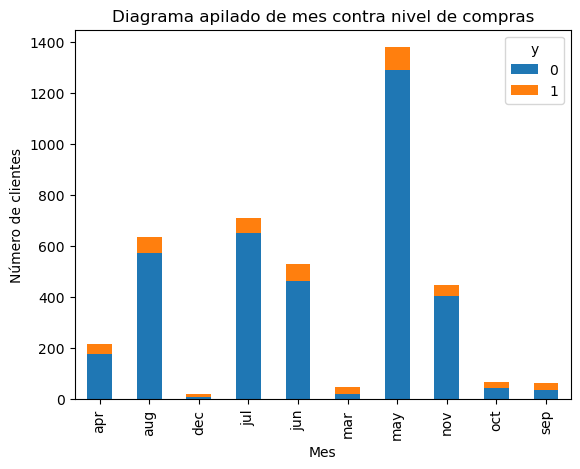

In [61]:
table.div(table.sum(1).astype(float),axis=0)
table.plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de mes contra nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Número de clientes")

Text(0, 0.5, 'Número de clientes')

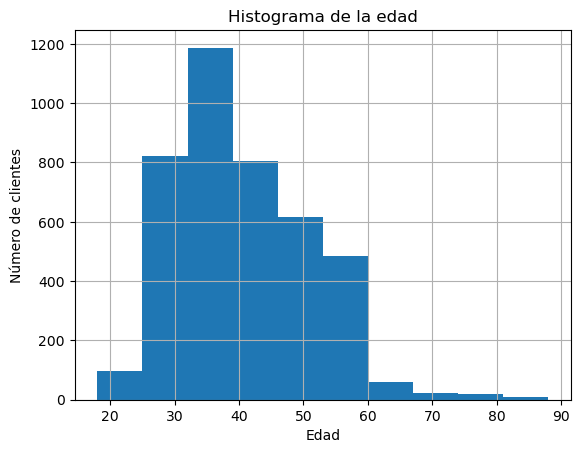

In [64]:
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Número de clientes")

Text(0, 0.5, 'Proporción de clientes')

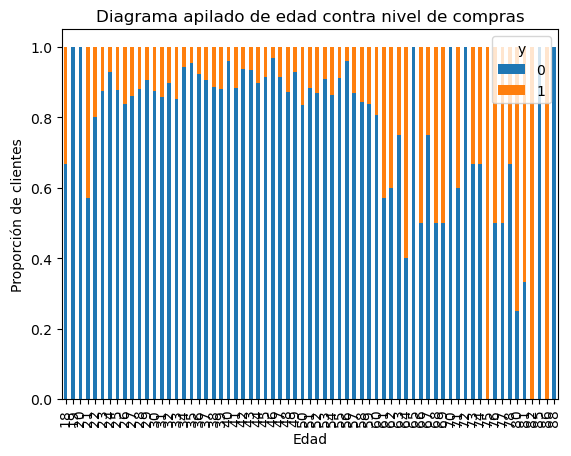

In [62]:
table = pd.crosstab(data.age, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de edad contra nivel de compras")
plt.xlabel("Edad")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

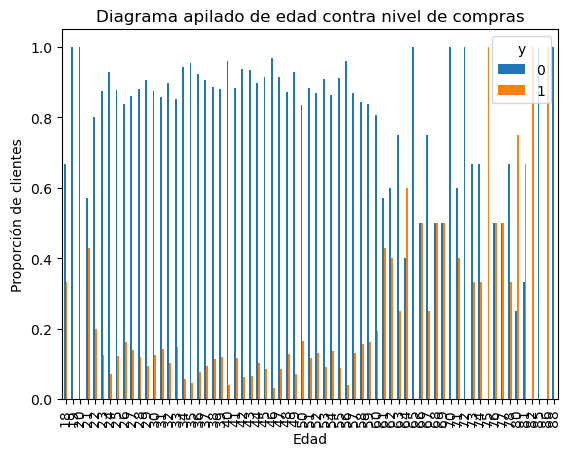

In [65]:
table = pd.crosstab(data.age, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = False)
plt.title("Diagrama apilado de edad contra nivel de compras")
plt.xlabel("Edad")
plt.ylabel("Proporción de clientes")

<Axes: xlabel='age'>

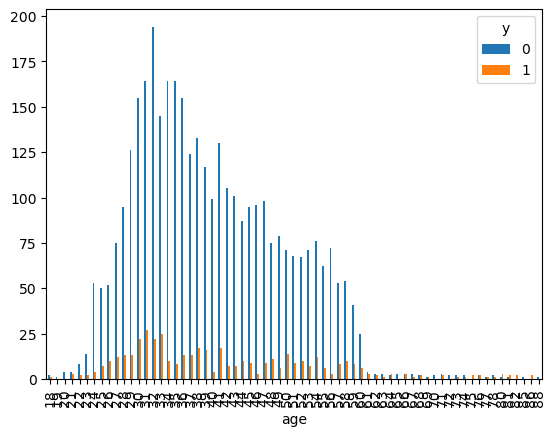

In [67]:
pd.crosstab(data.age, data.y).plot(kind = "bar", stacked = False)

<Axes: xlabel='poutcome'>

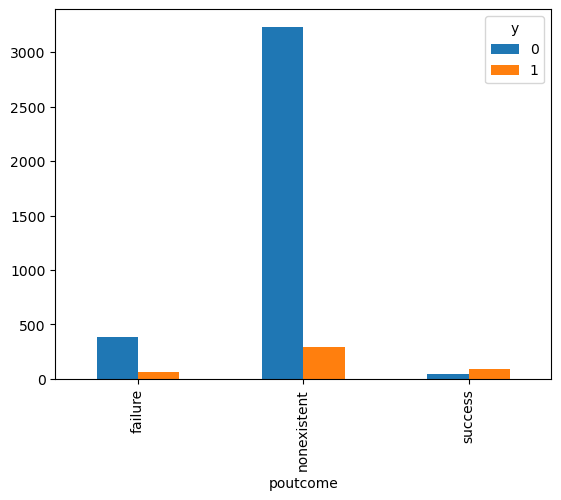

In [68]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar", stacked = False)

<Axes: xlabel='poutcome'>

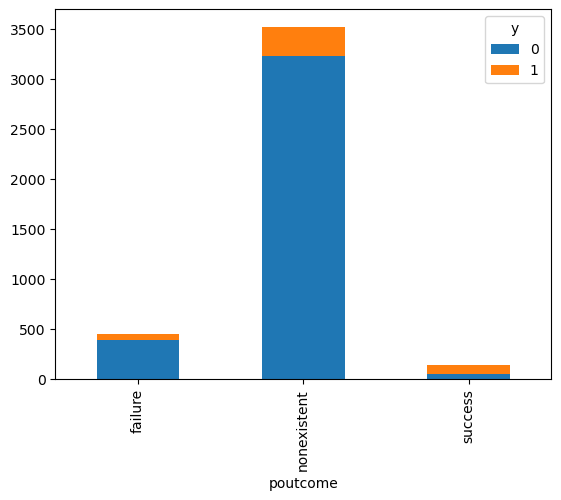

In [69]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar", stacked = True)

### poutcome (frecuencia de compras anteriores y éxito o fracaso de compras anteriores) es predictora de compras

## Conversión de variables categóricas a dummy's

In [108]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")
data["y"] = (data["y"]=="yes").astype(int) #False = 0, True = 1
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="high.school", "Hight School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [109]:
categories = ["job", "housing", "marital", "education", "default",'loan',
 'contact',
 'month',
 'day_of_week','poutcome']

In [110]:
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies =pd.get_dummies(data[category], prefix=cat_list)
    data = data.join(cat_dummies)

In [74]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,False,False,True,False,False,False,False,False,True,False
1,39,services,single,Hight School,no,no,no,telephone,may,fri,...,False,False,True,False,False,False,False,False,True,False
2,25,services,married,Hight School,no,yes,no,telephone,jun,wed,...,False,False,False,False,False,False,True,False,True,False
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,False,False,True,False,False,False,False,False,True,False
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,no,yes,yes,cellular,jul,thu,...,False,False,False,False,True,False,False,False,True,False
4115,39,admin.,married,Hight School,no,yes,no,telephone,jul,fri,...,False,False,True,False,False,False,False,False,True,False
4116,27,student,single,Hight School,no,no,no,cellular,may,mon,...,False,False,False,True,False,False,False,True,False,False
4117,58,admin.,married,Hight School,no,no,no,cellular,aug,fri,...,False,False,True,False,False,False,False,False,True,False


In [111]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_housing_no',
       'cat_housing_unknown', 'cat_housing_yes', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_Hight School',
       'cat_education_Illiterate', 'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_lo

In [112]:
data_vars = data.columns.values.tolist()

In [113]:
to_keep = [v for v in data_vars if v not in categories]

In [114]:
data[to_keep].columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_Hight School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr'

In [115]:
bank_data = data[to_keep]

In [117]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,True,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,True,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,False,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,False,False,True,False,False,False,False,True,False


In [130]:
bank_data["cat_default_no"]

0       True
1       True
2       True
3       True
4       True
        ... 
4114    True
4115    True
4116    True
4117    True
4118    True
Name: cat_default_no, Length: 4119, dtype: bool

In [118]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo: ¿Cuáles son más significativas?

In [165]:
n = 12

In [166]:
from sklearn import datasets

In [167]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [168]:
lr = LogisticRegression(max_iter=10000)

In [169]:
bank_data = data[to_keep]

In [170]:
bank_data["y"].describe()

count    4119.000000
mean        0.109493
std         0.312294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

In [171]:
bank_data[Y]

,y
0,0
1,0
2,0
3,0
4,0
...,...
4114,0
4115,0
4116,0
4117,0


In [172]:
bank_data[X]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,True,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,True,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,False,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,False,False,False,False,True,False,False,False,True,False
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,False,False,False,True,False,False,False,True,False,False
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,False,False,True,False,False,False,False,False,True,False


In [173]:
rfe = RFE(lr,n_features_to_select=n, step = 1)

In [174]:
rfe = rfe.fit(bank_data[X],  bank_data[Y].values.ravel())

In [175]:
print(rfe.support_)

[False False False False False  True  True False False False False  True
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False  True False False
  True  True  True False False False False False False False  True False
  True]


In [176]:
print(rfe.ranking_)

[36 45 19 50  5  1  1 26 46 42 10  1  1 43  2  9  1  3 34 11  8 14 12 20
 35 15 41 32 37 31 18 25 21 38  7 33 40 48 17 23 44  1  4 29 47  1 28 16
  1  1  1 24 22 39 27 49 30  6  1 13  1]


### Toca quedarse con las variables que tienen ranking = 1

In [177]:
bank_data_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'cat_job_admin.',
 'cat_job_blue-collar',
 'cat_job_entrepreneur',
 'cat_job_housemaid',
 'cat_job_management',
 'cat_job_retired',
 'cat_job_self-employed',
 'cat_job_services',
 'cat_job_student',
 'cat_job_technician',
 'cat_job_unemployed',
 'cat_job_unknown',
 'cat_housing_no',
 'cat_housing_unknown',
 'cat_housing_yes',
 'cat_marital_divorced',
 'cat_marital_married',
 'cat_marital_single',
 'cat_marital_unknown',
 'cat_education_Basic',
 'cat_education_Hight School',
 'cat_education_Illiterate',
 'cat_education_Professional Course',
 'cat_education_University Degree',
 'cat_education_Unknown',
 'cat_default_no',
 'cat_default_unknown',
 'cat_default_yes',
 'cat_loan_no',
 'cat_loan_unknown',
 'cat_loan_yes',
 'cat_contact_cellular',
 'cat_contact_telephone',
 'cat_month_apr',
 'cat_month_aug',
 'cat_month_dec',
 'cat_month_jul',
 'ca

In [181]:
list(zip(bank_data_vars,rfe.ranking_))

[('age', 36),
 ('duration', 45),
 ('campaign', 19),
 ('pdays', 50),
 ('previous', 5),
 ('emp.var.rate', 1),
 ('cons.price.idx', 1),
 ('cons.conf.idx', 26),
 ('euribor3m', 46),
 ('nr.employed', 42),
 ('y', 10),
 ('cat_job_admin.', 1),
 ('cat_job_blue-collar', 1),
 ('cat_job_entrepreneur', 43),
 ('cat_job_housemaid', 2),
 ('cat_job_management', 9),
 ('cat_job_retired', 1),
 ('cat_job_self-employed', 3),
 ('cat_job_services', 34),
 ('cat_job_student', 11),
 ('cat_job_technician', 8),
 ('cat_job_unemployed', 14),
 ('cat_job_unknown', 12),
 ('cat_housing_no', 20),
 ('cat_housing_unknown', 35),
 ('cat_housing_yes', 15),
 ('cat_marital_divorced', 41),
 ('cat_marital_married', 32),
 ('cat_marital_single', 37),
 ('cat_marital_unknown', 31),
 ('cat_education_Basic', 18),
 ('cat_education_Hight School', 25),
 ('cat_education_Illiterate', 21),
 ('cat_education_Professional Course', 38),
 ('cat_education_University Degree', 7),
 ('cat_education_Unknown', 33),
 ('cat_default_no', 40),
 ('cat_default

In [183]:
list(zip(bank_data_vars,rfe.support_, rfe.ranking_))

[('age', False, 36),
 ('duration', False, 45),
 ('campaign', False, 19),
 ('pdays', False, 50),
 ('previous', False, 5),
 ('emp.var.rate', True, 1),
 ('cons.price.idx', True, 1),
 ('cons.conf.idx', False, 26),
 ('euribor3m', False, 46),
 ('nr.employed', False, 42),
 ('y', False, 10),
 ('cat_job_admin.', True, 1),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 43),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 9),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 3),
 ('cat_job_services', False, 34),
 ('cat_job_student', False, 11),
 ('cat_job_technician', False, 8),
 ('cat_job_unemployed', False, 14),
 ('cat_job_unknown', False, 12),
 ('cat_housing_no', False, 20),
 ('cat_housing_unknown', False, 35),
 ('cat_housing_yes', False, 15),
 ('cat_marital_divorced', False, 41),
 ('cat_marital_married', False, 32),
 ('cat_marital_single', False, 37),
 ('cat_marital_unknown', False, 31),
 ('cat_education_Basic', False, 18),
 ('cat_education

In [186]:
cols = ["emp.var.rate", "cons.price.idx","cat_job_admin.","cat_job_blue-collar", "cat_job_retired", "cat_loan_yes", "cat_month_aug", "cat_month_jun", 
        "cat_month_mar", "cat_month_may","cat_day_of_week_wed", "cat_poutcome_nonexistent"]

In [187]:
X = bank_data[cols]

In [188]:
Y = bank_data["y"]

,emp.var.rate,cons.price.idx,cat_job_admin.,cat_job_blue-collar,cat_job_retired,cat_loan_yes,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
0,-1.8,92.893,False,True,False,False,False,False,False,True,False,True
1,1.1,93.994,False,False,False,False,False,False,False,True,False,True
2,1.4,94.465,False,False,False,False,False,True,False,False,True,True
3,1.4,94.465,False,False,False,False,False,True,False,False,False,True
4,-0.1,93.200,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.4,93.918,True,False,False,True,False,False,False,False,False,True
4115,1.4,93.918,True,False,False,False,False,False,False,False,False,True
4116,-1.8,92.893,False,False,False,False,False,False,False,True,False,False
4117,1.4,93.444,True,False,False,False,True,False,False,False,False,True


In [190]:
listaVacia = []

In [192]:
Z = list(zip(bank_data_vars,rfe.support_, rfe.ranking_))

In [198]:
for zi in Z:
    if zi[1]:
        listaVacia.append(zi[0])
listaVacia

['emp.var.rate',
 'cons.price.idx',
 'cat_job_admin.',
 'cat_job_blue-collar',
 'cat_job_retired',
 'cat_loan_yes',
 'cat_month_aug',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_day_of_week_wed',
 'cat_poutcome_nonexistent']

## Implementación del modelo en Python con statsmodel.api

In [205]:
import statsmodels.api as sm

In [214]:
X

,emp.var.rate,cons.price.idx,cat_job_admin.,cat_job_blue-collar,cat_job_retired,cat_loan_yes,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
0,-1.8,92.893,False,True,False,False,False,False,False,True,False,True
1,1.1,93.994,False,False,False,False,False,False,False,True,False,True
2,1.4,94.465,False,False,False,False,False,True,False,False,True,True
3,1.4,94.465,False,False,False,False,False,True,False,False,False,True
4,-0.1,93.200,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.4,93.918,True,False,False,True,False,False,False,False,False,True
4115,1.4,93.918,True,False,False,False,False,False,False,False,False,True
4116,-1.8,92.893,False,False,False,False,False,False,False,True,False,False
4117,1.4,93.444,True,False,False,False,True,False,False,False,False,True


In [217]:
np.asarray(X, dtype="float")[:5,:]

array([[-1.8  , 92.893,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  1.   ],
       [ 1.1  , 93.994,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ,  1.   ],
       [ 1.4  , 94.465,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  1.   ],
       [ 1.4  , 94.465,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  1.   ],
       [-0.1  , 93.2  ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ]])

In [220]:
logit_model = sm.Logit(np.asarray(Y, dtype="float"),np.asarray(X, dtype="float"))

In [221]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293229
         Iterations 7


In [222]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.1512
Time:                        22:27:47   Log-Likelihood:                -1207.8
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 2.316e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4673      0.035    -13.185      0.000      -0.537      -0.398
x2            -0.0190      0.002    -12.355      0.000      -0.022      -0.016
x3             0.2334      0.127      1.844      0.065      -0.015       0.481
x4            -0.2260      0.160     -1.413      0.158      -0.539       0.087
x5             0.4341      0.221      1.965      0.049       0.001       0.867
x6            -0.1403      0.150     -0.936      0.349      -0.434       0.154
x7             0.0253      0.165      0.153      0.878      -0.298       0.349
x8             0.4142      0.165      2.513      0.012       0.091       0.737
x9             1.5324      0.309      4.955      0.000       0.926       2.139
x10           -0.7783      0.139     -5.592      0.000      -1.051      -0.506
x11            0.0984      0.138      0.713      0.476      -0.172       0.369
x12           -0.5672      0.128     -4.428      0.000      -0.818      -0.316
==============================================================================
"""

## Implementación del modelo en Python con scikit-learn

In [239]:
from sklearn import linear_model

In [240]:
logit_model = linear_model.LogisticRegression(max_iter=10000)

In [241]:
logit_model.fit(X,Y)

LogisticRegression(max_iter=10000)

In [242]:
logit_model.score(X,Y)

0.8907501820830298

In [243]:
Y.mean()

0.10949259529011895

### Un 10.9% de la gente compra

In [244]:
1- Y.mean()

0.8905074047098811

In [245]:
pd.DataFrame(zip(X.columns, np.transpose(logit_model.coef_)))

,0,1
0,emp.var.rate,[-0.8392832410210639]
1,cons.price.idx,[1.1890801056639346]
2,cat_job_admin.,[0.23785568027734902]
3,cat_job_blue-collar,[-0.1931296689788603]
4,cat_job_retired,[0.27418016530483513]
5,cat_loan_yes,[-0.07057392627726983]
6,cat_month_aug,[0.490622353590128]
7,cat_month_jun,[-0.05782232969876183]
8,cat_month_mar,[1.5014267428157868]
9,cat_month_may,[-0.613231486024085]


### Se lee como el logaritmo del cociente de probabilidades por cada incremento en 1 de la variable de entrada

## Validación del modelo logístico

In [254]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [255]:
# Perform 5-fold cross-validation
cv_results = cross_validate(model, X, y, cv=5)

# Print the results
print(cv_results)

{'fit_time': array([0.01307797, 0.01642203, 0.01345181, 0.0127809 , 0.01099944]), 'score_time': array([0.00100422, 0.00100088, 0.        , 0.        , 0.00099993]), 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}


In [256]:
X = bank_data[cols]
Y = bank_data["y"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [258]:
lm = linear_model.LogisticRegression(max_iter=10000)
lm.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [264]:
len(X_train) + len(X_test)

4119

In [265]:
len(X)

4119

In [262]:
X_test

,emp.var.rate,cons.price.idx,cat_job_admin.,cat_job_blue-collar,cat_job_retired,cat_loan_yes,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
3754,1.4,94.465,False,True,False,True,False,True,False,False,False,True
45,-1.8,92.893,False,False,False,False,False,False,False,True,False,True
2774,1.4,94.465,False,False,False,False,False,True,False,False,False,True
1170,1.4,93.918,True,False,False,False,False,False,False,False,False,True
4042,-0.1,93.200,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1.4,93.918,True,False,False,False,False,False,False,False,False,True
1460,1.4,93.918,True,False,False,False,False,False,False,False,False,True
1363,-2.9,92.201,False,False,True,False,True,False,False,False,False,True
1898,1.1,93.994,False,False,False,False,False,False,False,True,False,True


In [266]:
probs = lm.predict_proba(X_test)

In [267]:
probs

array([[0.94191795, 0.05808205],
       [0.91072456, 0.08927544],
       [0.93484153, 0.06515847],
       ...,
       [0.72447431, 0.27552569],
       [0.97053473, 0.02946527],
       [0.55605672, 0.44394328]])

In [268]:
prediction = lm.predict(X_test)

In [269]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [277]:
from IPython.display import display, Math, Latex

In [284]:
display ( Math(r'Y_p = \begin{cases} 0& si\ p\leq 0.5 \\1& si\ p>0.5 \end{cases}'))

<IPython.core.display.Math object>

In [287]:
display ( Math(r'\varepsilon\in (0,1), Y_p = \begin{cases} 0& si\ p\leq \varepsilon \\1& si\ p>\varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [288]:
prob = probs[:,1]
prob

array([0.05808205, 0.08927544, 0.06515847, ..., 0.27552569, 0.02946527,
       0.44394328])

In [290]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] =np.where(prob_df[0]>threshold,1,0)
prob_df.head(100)

,0,prediction
0,0.058082,0
1,0.089275,0
2,0.065158,0
3,0.053036,0
4,0.056064,0
...,...,...
95,0.053036,0
96,0.092676,0
97,0.460248,1
98,0.072287,0


In [291]:
prob_df[0]

0       0.058082
1       0.089275
2       0.065158
3       0.053036
4       0.056064
          ...   
1231    0.053036
1232    0.053036
1233    0.275526
1234    0.029465
1235    0.443943
Name: 0, Length: 1236, dtype: float64

In [292]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,939
1,297


In [293]:
297/len(prob_df)*100

24.029126213592235

### incrmenta en nímero de los que compran por encima de 10%

In [295]:
threshold = 0.05
prob_df["prediction"] =np.where(prob_df[0]>threshold,1,0)
prob_df.head(100)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,528
1,708


In [296]:
708/len(prob_df)*100

57.28155339805825

In [297]:
from sklearn import metrics

In [301]:
metrics.accuracy_score(Y_test, prediction) # Incrementa la accuracy un poco por usar Xtest Xtrain

0.8988673139158576

## Validación cruzada

In [303]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [305]:
from sklearn.model_selection import cross_val_score

In [306]:
lm = linear_model.LogisticRegression(max_iter=10000)
lm.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [307]:
X

,emp.var.rate,cons.price.idx,cat_job_admin.,cat_job_blue-collar,cat_job_retired,cat_loan_yes,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
0,-1.8,92.893,False,True,False,False,False,False,False,True,False,True
1,1.1,93.994,False,False,False,False,False,False,False,True,False,True
2,1.4,94.465,False,False,False,False,False,True,False,False,True,True
3,1.4,94.465,False,False,False,False,False,True,False,False,False,True
4,-0.1,93.200,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.4,93.918,True,False,False,True,False,False,False,False,False,True
4115,1.4,93.918,True,False,False,False,False,False,False,False,False,True
4116,-1.8,92.893,False,False,False,False,False,False,False,True,False,False
4117,1.4,93.444,True,False,False,False,True,False,False,False,False,True


In [309]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

In [310]:
scores = cross_val_score(lm, X, Y, scoring="accuracy", cv=10)

In [311]:
scores

array([0.89563107, 0.89320388, 0.8907767 , 0.89320388, 0.87864078,
       0.89563107, 0.87864078, 0.88349515, 0.8907767 , 0.89051095])

In [312]:
scores.mean()

0.889051094890511

### El modelo generaliza muy bien la información

In [313]:
from IPython.display import Image 

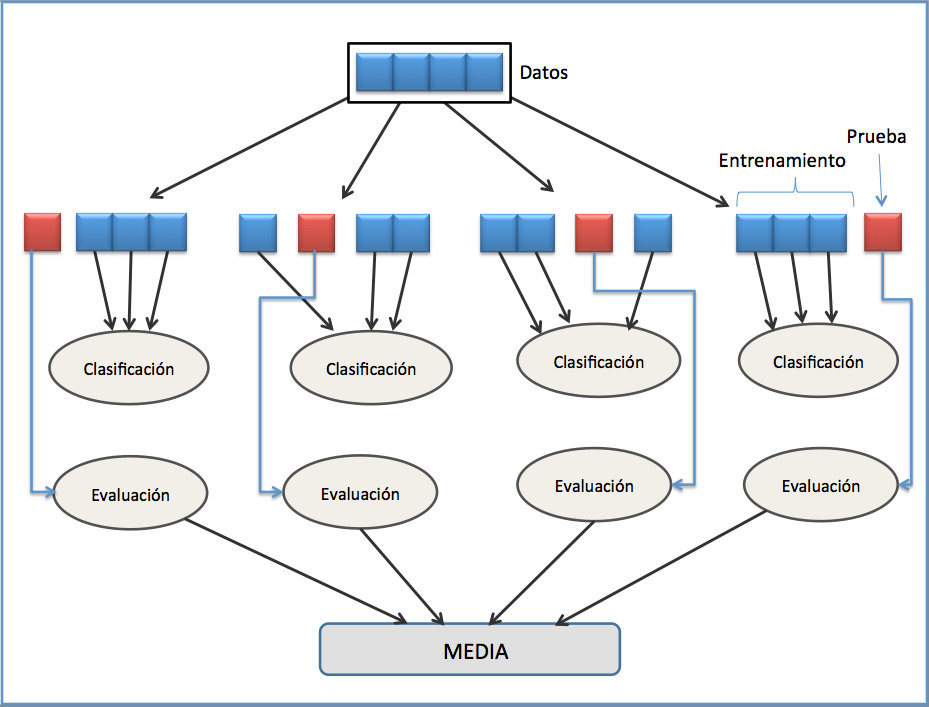

In [314]:
Image("../notebooks/Esquema_validacion_cruzada.jpg")

In [317]:
scores = cross_val_score(lm, X, Y, scoring="accuracy", cv=20)

In [318]:
scores.mean()

0.8895358749704002

In [319]:
from sklearn.model_selection import LeaveOneOut

In [320]:
scores = cross_val_score(lm, X, Y, scoring="accuracy", cv=LeaveOneOut())

In [321]:
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [322]:
scores.mean()

0.8890507404709881

## Matriz de Confusión

Las 4 opciones siguientes son las que conforman lo que se conoce como la matriz de confusión:

* en este caso al ser sólo dos posibilidades:  positivo o negativo (o clase 1 y clase 2]),  hablamos de una matriz binaria.  Aca entonces surgen  cuatro opciones:

* Persona que tiene covid19 y el modelo lo clasificó como covid19 (+) . Esto sería un verdadero positivo o VP .
* Persona que no tiene covid19  y el modelo lo clasifico como covid19 (-) . Este seria un verdadero negativo o sea un VN.
* Persona que tiene covid19 y el modelo lo clasificó como covid19 (-) .  Éste seria un error tipo II o un falso negativo o FN.
* Persona que no tiene covid19  y el modelo lo clasificó como covid19 (+) . Este es un error tipo I,  o un falso positivo o FP.

## Matrices de Confusión y Curvas ROC (Característica Operativa del Receptor)

In [465]:
X = bank_data[cols]
Y = bank_data["y"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2024)

In [466]:
lm = linear_model.LogisticRegression(max_iter=10000)
lm.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [467]:
probs = lm.predict_proba(X_test)

In [468]:
prob = probs[:,1] # Los pronósticos de Y
prob

array([0.0304434 , 0.062703  , 0.30776997, ..., 0.02440119, 0.03310424,
       0.04088196])

In [469]:
prob_df = pd.DataFrame(prob)
prob_df

,0
0,0.030443
1,0.062703
2,0.307770
3,0.031237
4,0.049095
...,...
1231,0.359097
1232,0.030915
1233,0.024401
1234,0.033104


In [470]:
prob_df[0]

0       0.030443
1       0.062703
2       0.307770
3       0.031237
4       0.049095
          ...   
1231    0.359097
1232    0.030915
1233    0.024401
1234    0.033104
1235    0.040882
Name: 0, Length: 1236, dtype: float64

In [471]:
threshold = 0.1
prob_df["prediction"] =np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] =list(Y_test)
prob_df.head(100)

,0,prediction,actual
0,0.030443,0,0
1,0.062703,0,0
2,0.307770,1,0
3,0.031237,0,0
4,0.049095,0,0
...,...,...,...
95,0.485997,1,0
96,0.042397,0,0
97,0.125519,1,0
98,0.125519,1,0


In [472]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [473]:
confusion_matrix

actual,0,1
prediction,,
0,840,44
1,272,80


In [474]:
TN = confusion_matrix[0][0] # 0 negative 1 positive
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1] #  La predicción lo marca 1(+), pero es 0(-)
FN = confusion_matrix[1][0] #  La predicción lo marca 0(-), pero es 1(+)

print (TP,FP,FN,TN)

80 272 44 840


In [475]:
confusion_matrix[0] #Primera columna de la matriz de confusióm

prediction
0    840
1    272
Name: 0, dtype: int64

In [476]:
confusion_matrix[1] # Segunda columna de la matriz de confusión

prediction
0    44
1    80
Name: 1, dtype: int64

In [477]:
confusion_matrix[0][1]

272

In [478]:
sens = TP/(TP+FN)
sens

0.6451612903225806

In [479]:
espec_1 = 1- TN/(TN+FP)
espec_1

0.24460431654676262

In [480]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensibilities = [1]
especifities_1 = [1]
for t in threshold:
    prob_df["prediction"] =np.where(prob_df[0]>t,1,0)
    prob_df["actual"] =list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0] # 0 negative 1 positive
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1] #  La predicción lo marca 1(+), pero es 0(-)
    FN = confusion_matrix[1][0] #  La predicción lo marca 0(-), pero es 1(+)
    sens = TP/(TP+FN)
    espec_1 = 1- TN/(TN+FP)
    sensibilities.append(sens)
    especifities_1.append(espec_1)

sensibilities.append(0)
especifities_1.append(0)


In [481]:
list(zip(sensibilities, especifities_1))

[(1, 1),
 (0.8145161290322581, 0.6429856115107914),
 (0.75, 0.47931654676258995),
 (0.6854838709677419, 0.34982014388489213),
 (0.6451612903225806, 0.24460431654676262),
 (0.6129032258064516, 0.1960431654676259),
 (0.5806451612903226, 0.14568345323741005),
 (0.5645161290322581, 0.11960431654676262),
 (0.5564516129032258, 0.09442446043165464),
 (0.5161290322580645, 0.07643884892086328),
 (0.4274193548387097, 0.06654676258992809),
 (0.2661290322580645, 0.026978417266187105),
 (0.10483870967741936, 0.011690647482014427),
 (0, 0)]

In [482]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC  ')

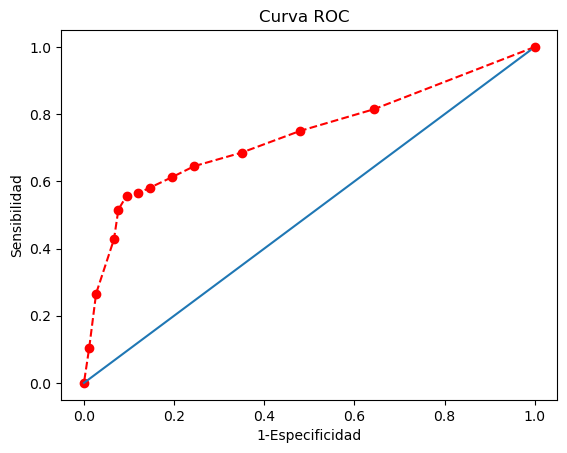

In [483]:
plt.plot(especifities_1, sensibilities, marker= "o", linestyle = "--", color = "r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC  ")

In [484]:
from sklearn import metrics

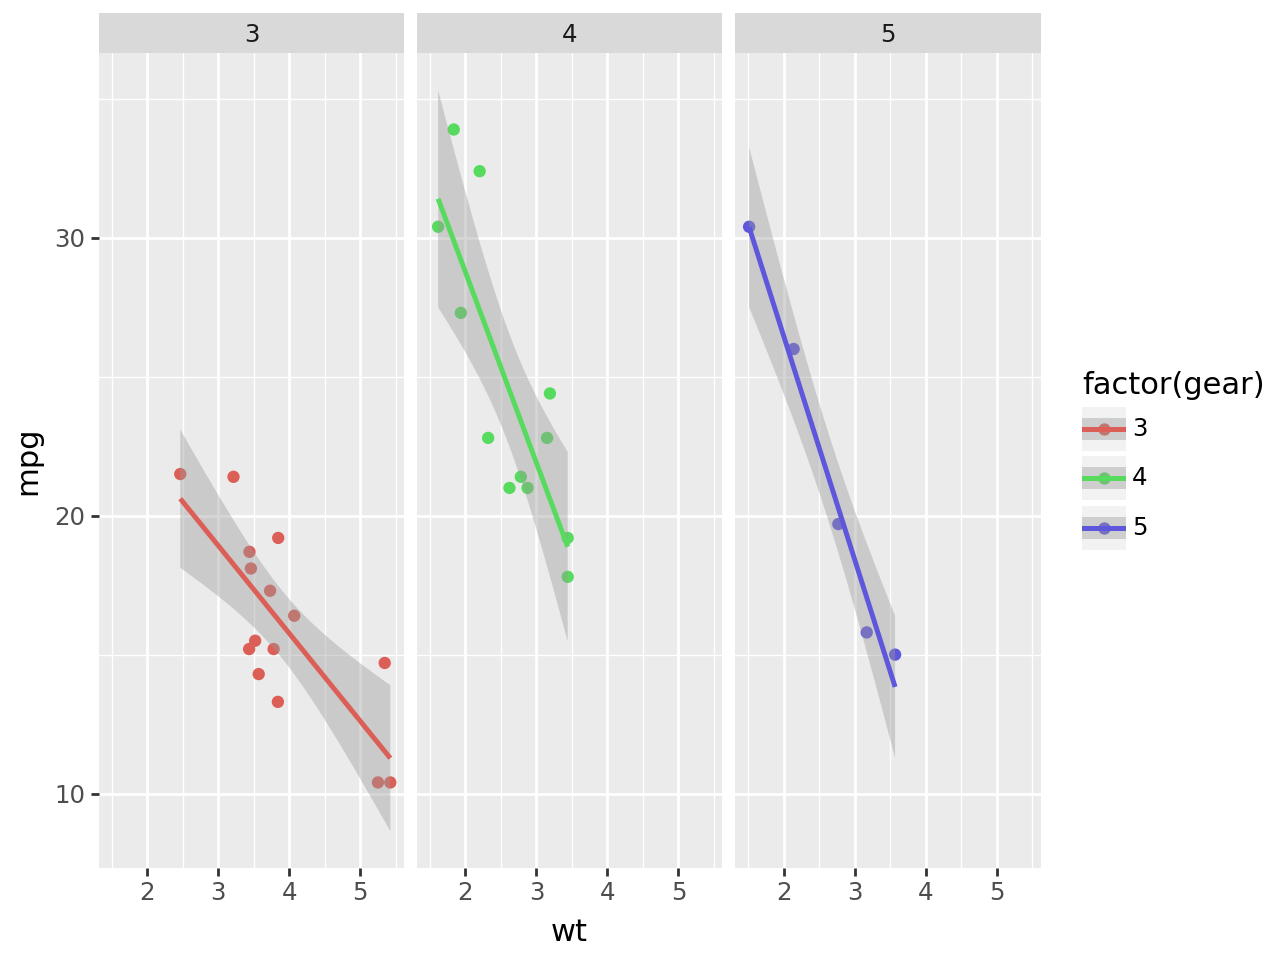

In [505]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_area, geom_line, geom_abline, ggtitle, xlab, ylab
from plotnine.data import mtcars

(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("gear")
)

In [486]:
prob

array([0.0304434 , 0.062703  , 0.30776997, ..., 0.02440119, 0.03310424,
       0.04088196])

In [487]:
espec_1, sens, _ = metrics.roc_curve(Y_test, prob)

In [488]:
sens

array([0.        , 0.        , 0.01612903, 0.01612903, 0.0483871 ,
       0.0483871 , 0.05645161, 0.05645161, 0.05645161, 0.06451613,
       0.08064516, 0.08064516, 0.08064516, 0.08870968, 0.10483871,
       0.12096774, 0.12903226, 0.12903226, 0.14516129, 0.16129032,
       0.16935484, 0.16935484, 0.17741935, 0.19354839, 0.19354839,
       0.19354839, 0.19354839, 0.21774194, 0.23387097, 0.23387097,
       0.25      , 0.25      , 0.26612903, 0.27419355, 0.27419355,
       0.27419355, 0.29032258, 0.2983871 , 0.30645161, 0.30645161,
       0.31451613, 0.31451613, 0.32258065, 0.32258065, 0.32258065,
       0.32258065, 0.32258065, 0.34677419, 0.35483871, 0.35483871,
       0.37096774, 0.37903226, 0.37903226, 0.37903226, 0.39516129,
       0.41129032, 0.41129032, 0.41129032, 0.42741935, 0.42741935,
       0.44354839, 0.44354839, 0.45967742, 0.46774194, 0.46774194,
       0.47580645, 0.47580645, 0.49193548, 0.5       , 0.5       ,
       0.51612903, 0.51612903, 0.54032258, 0.5483871 , 0.54838

In [489]:
espec_1

array([0.00000000e+00, 8.99280576e-04, 1.79856115e-03, 3.59712230e-03,
       3.59712230e-03, 4.49640288e-03, 4.49640288e-03, 6.29496403e-03,
       7.19424460e-03, 7.19424460e-03, 7.19424460e-03, 9.89208633e-03,
       1.16906475e-02, 1.16906475e-02, 1.16906475e-02, 1.16906475e-02,
       1.34892086e-02, 1.43884892e-02, 1.43884892e-02, 1.43884892e-02,
       1.61870504e-02, 1.79856115e-02, 1.79856115e-02, 1.79856115e-02,
       2.06834532e-02, 2.24820144e-02, 2.33812950e-02, 2.33812950e-02,
       2.42805755e-02, 2.60791367e-02, 2.60791367e-02, 2.69784173e-02,
       2.69784173e-02, 2.78776978e-02, 2.87769784e-02, 3.14748201e-02,
       3.14748201e-02, 3.32733813e-02, 3.41726619e-02, 3.59712230e-02,
       3.59712230e-02, 3.95683453e-02, 4.04676259e-02, 4.22661871e-02,
       4.31654676e-02, 4.49640288e-02, 4.58633094e-02, 4.76618705e-02,
       4.94604317e-02, 5.03597122e-02, 5.03597122e-02, 5.03597122e-02,
       5.12589928e-02, 5.30575540e-02, 5.30575540e-02, 5.75539568e-02,
      

In [490]:
df = pd.DataFrame(
    {"x": espec_1,
    "y": sens}
)

In [491]:
df

,x,y
0,0.000000,0.000000
1,0.000899,0.000000
2,0.001799,0.016129
3,0.003597,0.016129
4,0.003597,0.048387
...,...,...
175,0.954137,0.951613
176,0.964928,0.959677
177,0.965827,0.959677
178,0.992806,0.991935


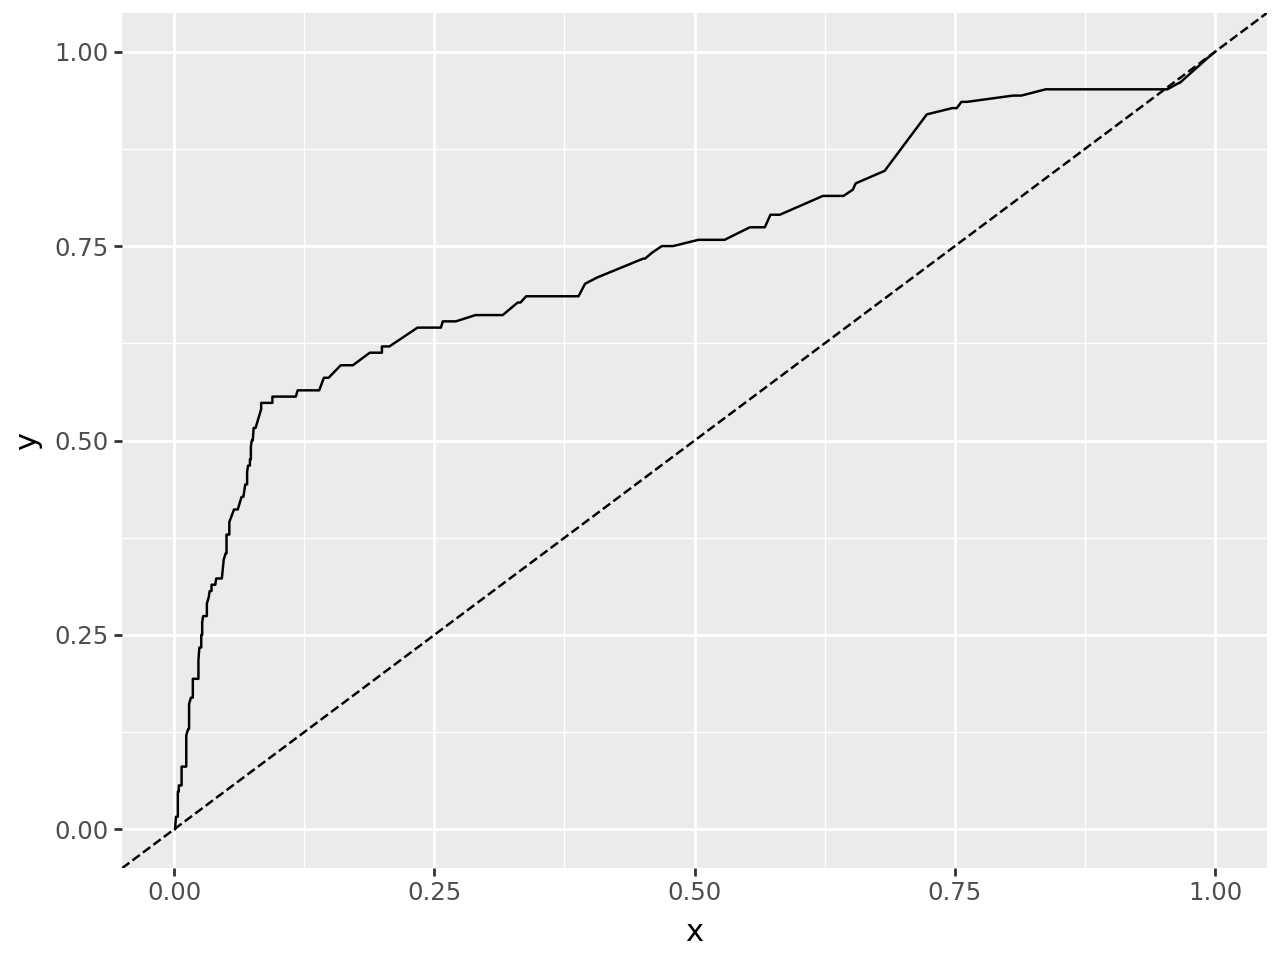

In [492]:
ggplot(df, aes(x ="x", y = "y")) + geom_line()+ geom_abline(linetype="dashed")

In [493]:
auc = metrics.auc(espec_1, sens)
auc

0.7428492689719194

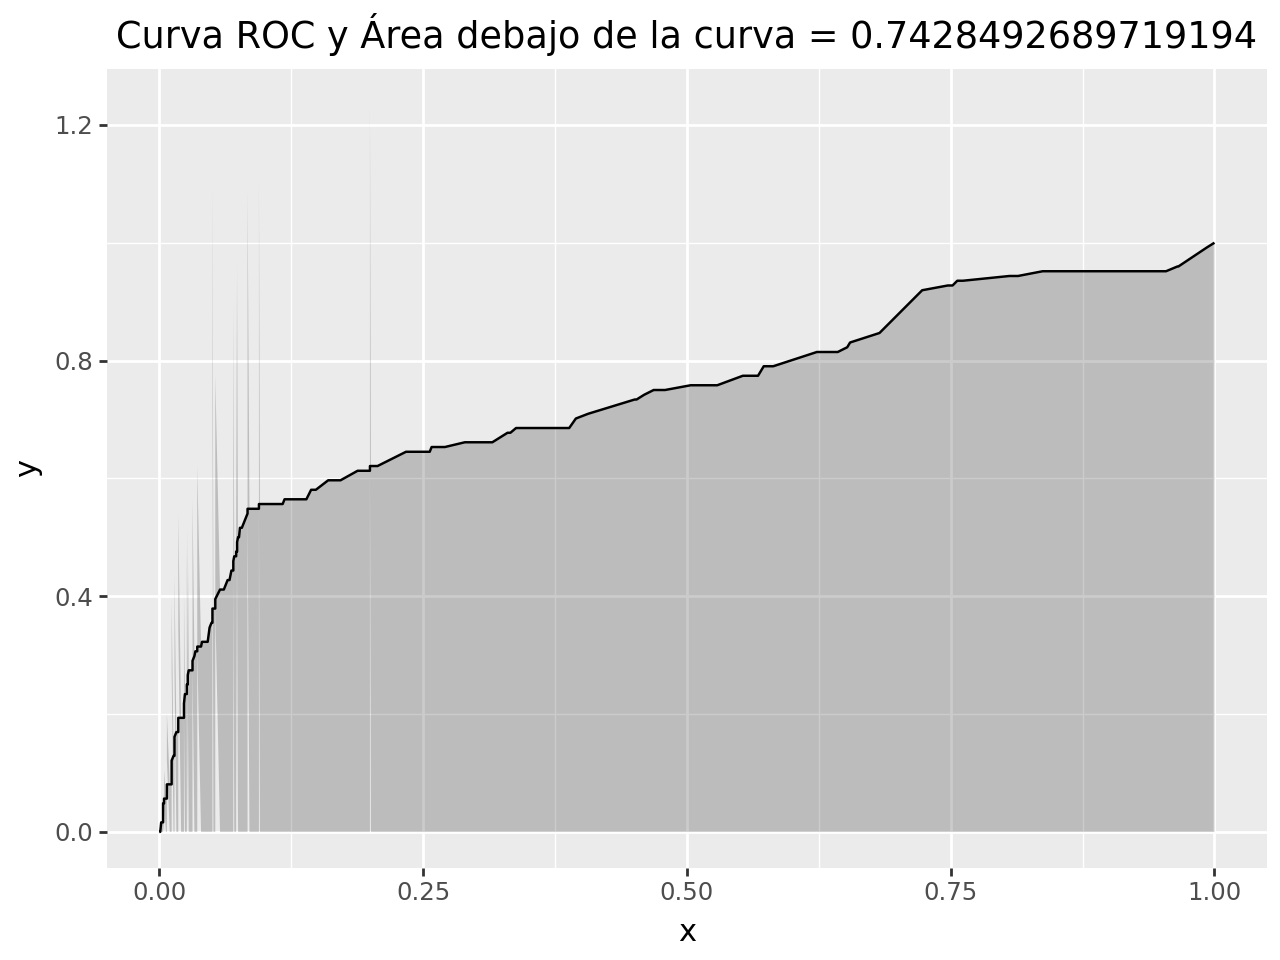

In [494]:
ggplot(df, aes(x = "x", y ="y", xmin= 0, ymin=0)) + geom_area(alpha= 0.25) + geom_line(aes(y="y")) + ggtitle("Curva ROC y Área debajo de la curva = %s" % str(auc))

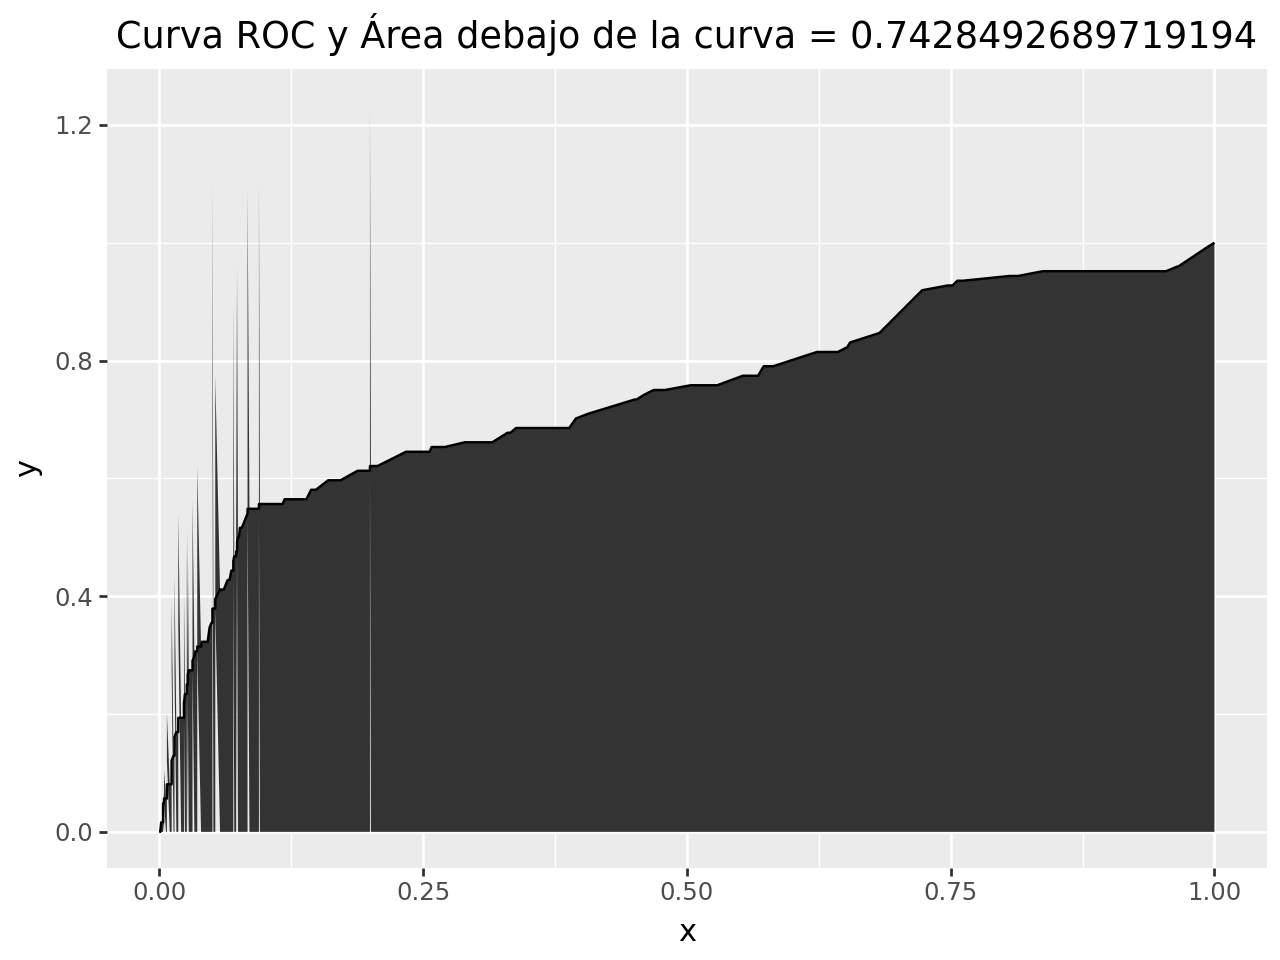

In [503]:
ggplot(df, aes(x = "x", y ="y")) + geom_area(aes(x = "x", y ="y"), data=df, stat="identity") + geom_line(aes(y="y")) + ggtitle("Curva ROC y Área debajo de la curva = %s" % str(auc))

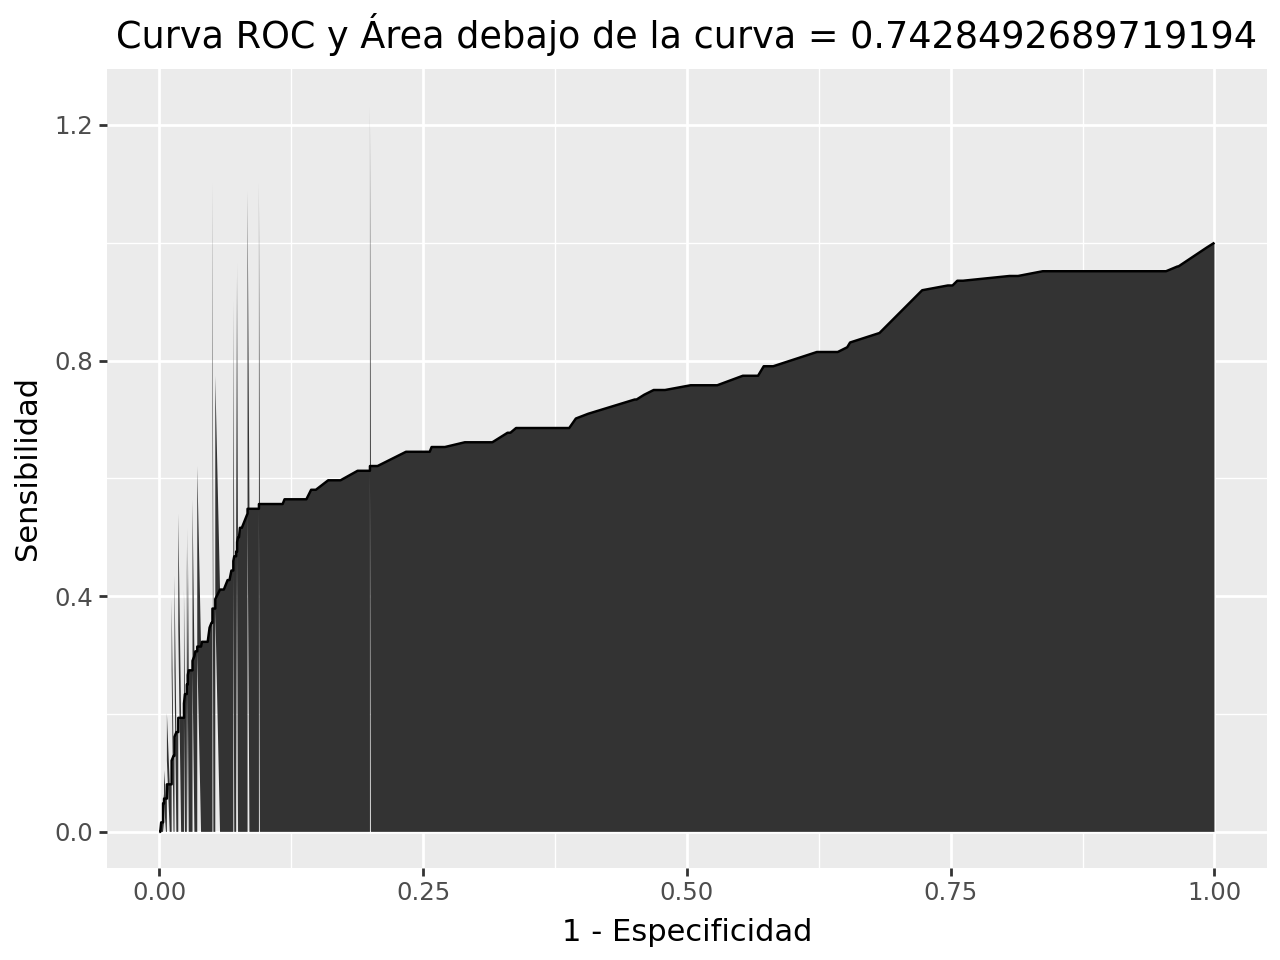

In [507]:
ggplot(df, aes(x = "x", y ="y")) + geom_area(aes(x = "x", y ="y"), data=df, stat="identity") + geom_line(aes(y="y")) + ggtitle("Curva ROC y Área debajo de la curva = %s" % str(auc)) + xlab("1 - Especificidad") + ylab("Sensibilidad")